In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/photo/5.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다

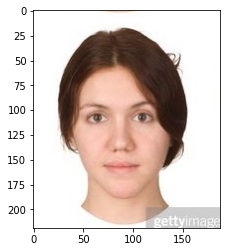

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
print("ok")

ok


In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("ok")

ok


rectangles[[(32, 80) (139, 187)]]


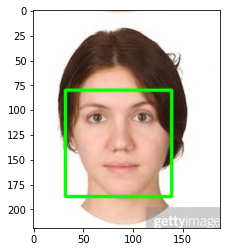

In [6]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("ok")

ok


In [8]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


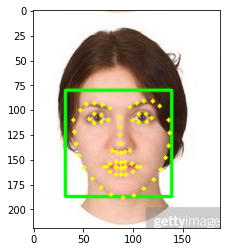

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
#고양이 수염 스티커의 위치는 얼굴의 정중앙 즉 코에 위치하여야 한다. 따라서 Xnose=0 Ynose=1
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다 왜???
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(88, 134)
(x,y) : (88,134)
(w,h) : (108,108)


(108, 108, 3)


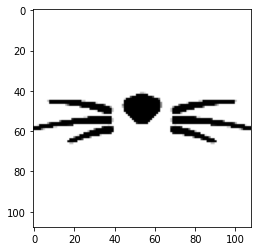

In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/photo/CAT.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)

In [12]:
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (34,80)


In [13]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (34,80)


In [14]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
print("슝~")

슝~


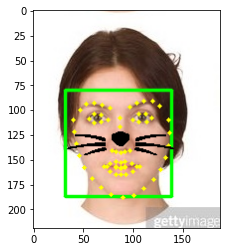

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

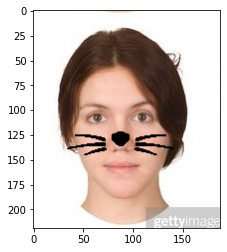

In [16]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8) #여기서 많이 해멨는데 계속 수염부분이 투명으로
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))       # 나머지 부분이 흰색으로 채워져 있었다. 그래서 노드와 뭐가 다른지 고민하다
plt.show()                                        #노드에선 검은색으로 마킹된 부분이 사라지고 색이 들어갔고 여기에선 배경을 지우고
#고양이 수염만 넣어야 된다는것을 알았다. 따라서 채워지고 지워지는것을 바꾸면 된다고 생각하여 바꿨다. 

In [17]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/photo/1.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다

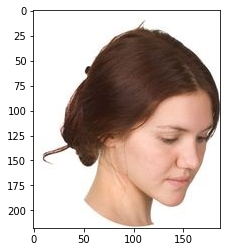

(218, 187, 3)


In [18]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
print(img_rgb.shape)#세로 가로 색, 밑에서 계속 오류가 나서 밑과 오른쪽에 대해 넘어간 것을 고려하지 않았다고 생각
#이미지 크기를 출력함

In [19]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("ok")

ok


rectangles[[(96, 96) (185, 186)]]


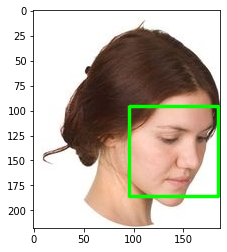

In [20]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [21]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


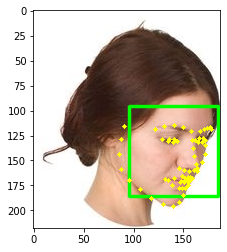

In [22]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [23]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다 왜???
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(163, 154)
(x,y) : (163,154)
(w,h) : (90,90)


(90, 90, 3)


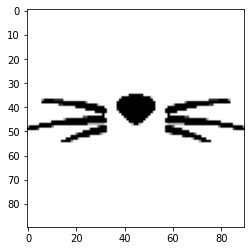

In [24]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/photo/CAT.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)

In [25]:
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (118,109)


In [26]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_x > 187:
    refinend_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
if refined_y > 218:
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (118,109)


In [27]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
print("슝~") #계속 여기서 오류가 나서 제 능력으론 오류를 해결 못했습니다. 오른쪽이나 밑으로 빠졌을때를 생각해서
#이미지 shape를 프린트해서 x y의 범위가 이미지를 오른쪽 밑으로 벗어날때를 고려해서 했는데도 계속 오류가 나와서
#쫌 어려웠습니다. 행렬의 형태가 같은데 왜 덧셈이 안된다고 나오는지. 그래서 생각으로만...여러 고려사항들을 생각해 봤습니다.

ValueError: operands could not be broadcast together with shapes (90,90,3) (90,90,3) (90,69,3) 

In [ ]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [33]:
#얼굴 각도에 따라 스티커가 어떻게 변해야할까요? 
#왼쪽 얼굴, 오른쪽 얼굴과 카메라 사이의 거리가 달라지므로 수염의 크기가 달라지고 수염의 각도또한 얼굴 각도에 따라
#단순히 좌우 직선으로 뻣는 형태가 아니라 각도에 따라 다르게 각도를 설정해줘야 한다.
#그것을 해소하기 위해선 스티커를 좌 우 분리하고 거리에 대한 수염의 리사이징과 얼굴각도에 대한 수염의 위치를 다시
#고려하여야 한다.
#우선 수염을 좌 중앙 우 이렇게 삼등분을 하고 중앙을 30 좌우로는 2, 14방향으로 뻣는다고 가정하면 대략적인 각도, 방향을
#설정할 수 있다. 그리고 2,30 사이 거리 30, 14사이 거리로 수염의 크기의 설정 비율도 계산 할 수 있을것이다.
#그렇게 설정을 하고 좌 우 스티커를 따로 붙이는 코딩을 하면 될 것이라 생각
#멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
#너무 멀리서 촬영하면 얼굴 영역을 잘 인식하지 못할것같다.


In [ ]:
#처음에 원래 1번사진으로 시작해서 어려웠던것 같다. 원래 계획은 9개의 각도로 꺽인 사진으로 각도에 대해 설정하고 
#실제로도 잘 적용되는지를 하려고 했는데 1번 사진에서 너무 막혀서 힘들었던거 같다.
#그래서 우선은 가장 쉬운 5번으로 해서 기본적인 알고리즘이 적용이 되는지를 먼저 했다. 다음부터 할때도 가장 기본
#적인것을 먼저 해보고 다른 어려운? 응용해야 되는 데이터를 써야겠다는걸 느꼈다.
#아직 복사 붙이는 식으로 해서 사이사이 하나가 막히면 너무 이론쪽 오류만 생각했는데 코딩이 뭘 의미하는지를 먼저
#알고 해야 된다는것을 뻐져리게 느꼈다.